# 重みに関する話題
- MNISTでの試行

In [1]:
#最初のお約束の設定
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
#import common.gradient as g #例えば、本書の共通ライブラリを読み込む場合の設定
import numpy as np
import matplotlib.pyplot as plt  #pylabから色々と呼び出してしまうと、本来のモジュールがわからないまま使用することとなり、かえって混乱してしまうため、pylabは使わないことを強く推奨します。
######################################################
#sigmoid関数などの読み込み。
from common.functions import sigmoid #sigmoid関数の読み込み。
# Notebook出力には次の１行が必要（%matplotlib inlineだとグラフを回転できない）
%matplotlib notebook

===========iteration:0===========
std=0.01:2.3025140882857635
Xavier:2.3108010849888543
He:2.3629775238871993
===========iteration:100===========
std=0.01:2.3024337998394597
Xavier:2.2411010605215482
He:1.4561232928806858
===========iteration:200===========
std=0.01:2.301397291687933
Xavier:2.160028879354733
He:0.7647113861024575
===========iteration:300===========
std=0.01:2.301960905546041
Xavier:1.9154437147802001
He:0.483748730875649
===========iteration:400===========
std=0.01:2.2982064706687977
Xavier:1.4675075341692096
He:0.41962083302629033
===========iteration:500===========
std=0.01:2.3038549774083874
Xavier:1.0450263594491087
He:0.4936805809062378
===========iteration:600===========
std=0.01:2.304347314990927
Xavier:0.7136238087951621
He:0.3130673667255934
===========iteration:700===========
std=0.01:2.30244563484238
Xavier:0.6398048637884574
He:0.4131082863819908
===========iteration:800===========
std=0.01:2.2975453321893373
Xavier:0.4589146710187394
He:0.26577886797079997

<IPython.core.display.Javascript object>


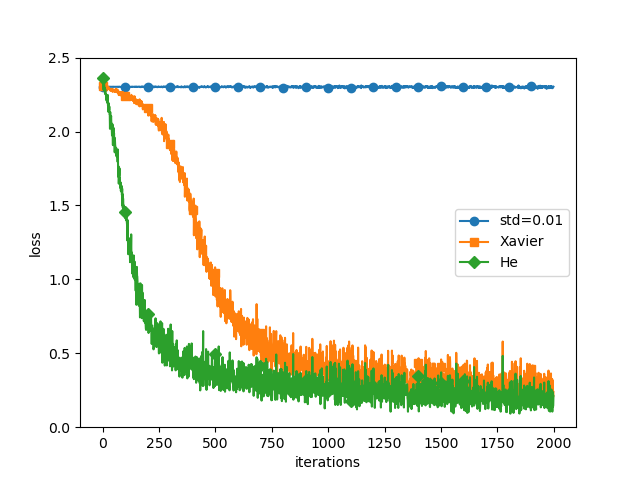

In [3]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
#    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
    plt.plot(x, train_loss[key], marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()


テキストでも説明されているように、Xavier(sigmoid)よりもHe(ReLU)のほうが収束が速いことがわかる。また、stdでは全く学習が進んでいない。なお、stdでは値は0.01を使い、アクティベーションレイヤとしてReLUを使っている。